In [1]:
import tensorflow as tf

tf.random.set_seed(0)

n_input = 1
n_hidden = 5
n_output = 1

In [2]:
w1 = tf.Variable(tf.random.normal([n_input, n_hidden]))
w2 = tf.Variable(tf.random.normal([n_hidden, n_output]))

b1 = tf.Variable(tf.random.normal([n_hidden]))
b2 = tf.Variable(tf.random.normal([n_output]))

optimizer = tf.optimizers.Adam()

2022-03-05 05:30:18.627401: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 05:30:18.628495: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
def forward(x):
    hidden = x @ w1 + b1
    hidden = tf.nn.tanh(hidden)
    y = hidden @ w2 + b2
    return y


@tf.function
def step(X, y):
    weights = [w1, b1, w2, b2]
    with tf.GradientTape() as tape:
        prediction = forward(X)
        loss = tf.losses.mean_squared_error(y_true=y, y_pred=prediction)
        loss = tf.reduce_mean(loss)

    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))

    return loss

In [4]:
x = tf.linspace(0.0, 1.0, 100)
X = tf.reshape(x, (-1, 1))
y = tf.exp(X)

losses = []
for i in range(500):
    loss = step(X, y).numpy()
    losses.append(loss)
    if i % 10 == 0:
        print("{:03d} : {:08.6f}".format(i, sum(losses[-10:]) / 10))

000 : 0.011645
010 : 0.101691
020 : 0.078577
030 : 0.060949
040 : 0.048190
050 : 0.039104
060 : 0.032544
070 : 0.027598
080 : 0.023640
090 : 0.020304
100 : 0.017402
110 : 0.014844
120 : 0.012584
130 : 0.010595
140 : 0.008854
150 : 0.007341
160 : 0.006036
170 : 0.004922
180 : 0.003979
190 : 0.003189
200 : 0.002534
210 : 0.001997
220 : 0.001562
230 : 0.001213
240 : 0.000936
250 : 0.000719
260 : 0.000551
270 : 0.000422
280 : 0.000324
290 : 0.000251
300 : 0.000197
310 : 0.000157
320 : 0.000128
330 : 0.000107
340 : 0.000092
350 : 0.000082
360 : 0.000075
370 : 0.000069
380 : 0.000066
390 : 0.000063
400 : 0.000062
410 : 0.000060
420 : 0.000059
430 : 0.000059
440 : 0.000058
450 : 0.000058
460 : 0.000057
470 : 0.000057
480 : 0.000057
490 : 0.000057


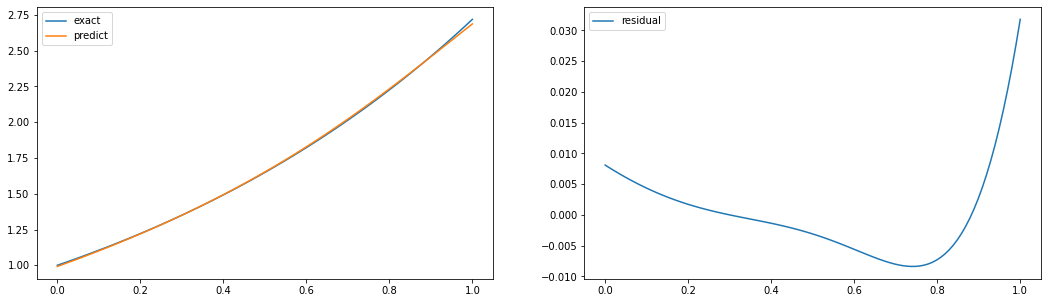

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

domain = x.numpy()
exact = y.numpy().flatten()
predict = forward(X).numpy().flatten()

axs[0].plot(domain, exact, label='exact')
axs[0].plot(domain, predict, label='predict')
axs[0].legend()

axs[1].plot(domain, exact - predict, label='residual')
axs[1].legend()
fig.savefig('residual.jpg', bbox_inches='tight')

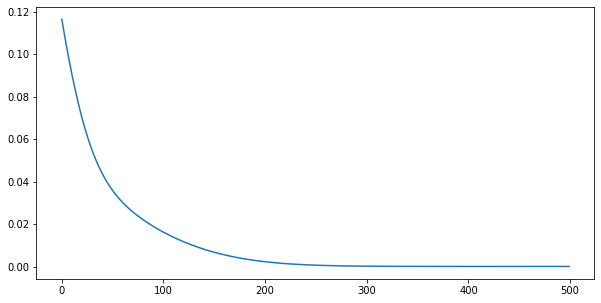

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.savefig('loss.jpg', bbox_inches='tight')